In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [93]:
rawdata = {'x': [1, 2, 4, 3, 5], 'y': [1, 3, 3, 2, 5]}
df = pd.DataFrame(rawdata)
df

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


In [94]:
df.to_csv('rawdata.csv', index=False)

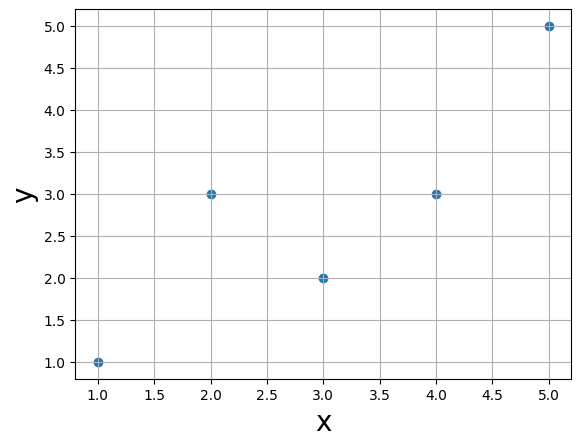

In [95]:
data = pd.read_csv('rawdata.csv')
y = data ['y']
x1 = data ['x']
plt.scatter(x1,y)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.grid()
plt.show()

### Simple linear regression equation  
$y = B0 + B1 \times x$  
y is the output variable we want to predict  
x is the input variable we know  
B0 (intercept) is the bias  
B1 is the slope  

**To estimate B1:**  
$B1 = \Sigma \frac{(x_i - mean(x)) \times (y_i-mean(y))}{\Sigma (x_i - mean(x))^2}$  
where x_i and y_i means using all different values of x and y where i means the i'th value of x and y

**To estimate B0:**  
$B0 = mean(y) - B1 \times mean(x)$

### Estimating B1
[23] - [43]  
$mean = \frac{1}{n} \times \Sigma x$  
This can be calculated using the mean command using pandas

In [96]:
mean_x = df['x'].mean() # calculating mean(x)
print(mean_x)

3.0


In [97]:
def xminusmeanx(row):
    return row['x']-mean_x # calculates x - mean(x) for every value of x

df['x-mean_x'] = df.apply(xminusmeanx, axis=1) # adds a column (as seen by axis=1) to df with the values calculated by the function above
print(df)

   x  y  x-mean_x
0  1  1      -2.0
1  2  3      -1.0
2  4  3       1.0
3  3  2       0.0
4  5  5       2.0


In [98]:
mean_y = df['y'].mean()
def yminusmeany(row):
    return row['y']-mean_y

df['y-mean_y'] = df.apply(yminusmeany, axis=1)
print(df)

   x  y  x-mean_x  y-mean_y
0  1  1      -2.0      -1.8
1  2  3      -1.0       0.2
2  4  3       1.0       0.2
3  3  2       0.0      -0.8
4  5  5       2.0       2.2


In [99]:
def multiply(row):
    return row['x-mean_x']*row['y-mean_y']

df['multiply'] = df.apply(multiply, axis=1)
print(df)

   x  y  x-mean_x  y-mean_y  multiply
0  1  1      -2.0      -1.8       3.6
1  2  3      -1.0       0.2      -0.2
2  4  3       1.0       0.2       0.2
3  3  2       0.0      -0.8      -0.0
4  5  5       2.0       2.2       4.4


In [100]:
numerator = df['multiply'].sum()
print(f"numerator = {numerator}")

numerator = 8.0


In [101]:
def squared(row):
    return (row['x-mean_x'])**2

df['(x - mean_x)^2'] = df.apply(squared, axis=1)
print(df)

   x  y  x-mean_x  y-mean_y  multiply  (x - mean_x)^2
0  1  1      -2.0      -1.8       3.6             4.0
1  2  3      -1.0       0.2      -0.2             1.0
2  4  3       1.0       0.2       0.2             1.0
3  3  2       0.0      -0.8      -0.0             0.0
4  5  5       2.0       2.2       4.4             4.0


In [102]:
denominator = df['(x - mean_x)^2'].sum()
print(f"denominator = {denominator}")

denominator = 10.0


Thus $B1 = \frac{8}{10}$

In [103]:
B1 = numerator/denominator
print(f"B1 = {B1}")

B1 = 0.8


### Calculating B0  
Reminder: $B0 = mean(y) - B1 \times mean(x)$

In [104]:
B0 = mean_y-B1*mean_x
print(f"B0 = {B0}")

B0 = 0.39999999999999947


Floating point error! So must round B0 to 2SF

In [105]:
B0 = round(B0, 2) # 2 is the number of sig fig
print(f"B0 = {B0}")

B0 = 0.4


### Forming the equation  
We now know that  
$y = B0 + B1 \times x$  
is equal to  
$y = 0.4 + 0.8 \times x$

In [106]:
def predy(row):
    return 0.4+0.8*row['x']

df['predicted y'] = df.apply(predy, axis=1)
print(df)

   x  y  x-mean_x  y-mean_y  multiply  (x - mean_x)^2  predicted y
0  1  1      -2.0      -1.8       3.6             4.0          1.2
1  2  3      -1.0       0.2      -0.2             1.0          2.0
2  4  3       1.0       0.2       0.2             1.0          3.6
3  3  2       0.0      -0.8      -0.0             0.0          2.8
4  5  5       2.0       2.2       4.4             4.0          4.4


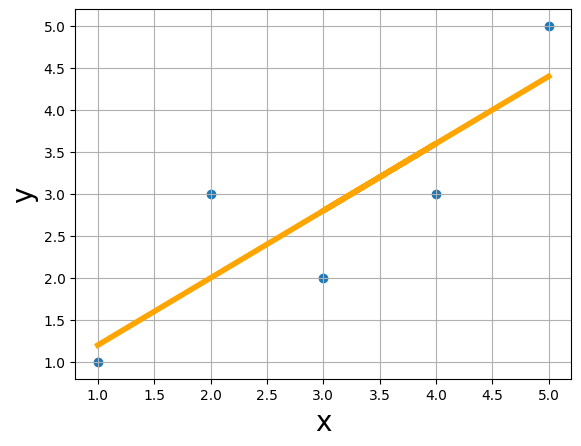

In [107]:
plt.scatter(x1, y)
yhat = B0 + B1*x1
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.grid()
plt.show()

### Estimating error  
Calculated using Root Mean Squared Error (RMSE)   
$RMSE = \sqrt{\frac{\Sigma(p_i-y_i)^2}{n}}$  
where p is the predicted value and n is the number of predictions

In [108]:
def p_minus_y_squared(row):
    return (row['predicted y']-row['y'])**2

df['(p - y)^2'] = df.apply(p_minus_y_squared, axis=1)
print(df)

   x  y  x-mean_x  y-mean_y  multiply  (x - mean_x)^2  predicted y  (p - y)^2
0  1  1      -2.0      -1.8       3.6             4.0          1.2       0.04
1  2  3      -1.0       0.2      -0.2             1.0          2.0       1.00
2  4  3       1.0       0.2       0.2             1.0          3.6       0.36
3  3  2       0.0      -0.8      -0.0             0.0          2.8       0.64
4  5  5       2.0       2.2       4.4             4.0          4.4       0.36


In [112]:
rmse_numerator = df['(p - y)^2'].sum()
n = len(df)
rmse = math.sqrt(rmse_numerator/n)
rmse = round(rmse, 3)
print(rmse)

0.693


Thus each prediction is wrong by about 0.693 units